## did in the hitdexter3_data_explore.pynb 
### prepare target_based data
- hitdexter3 target-based data
- only keep compound testec more than 100 times
- promiscous label assigned according to hitdexter3 paper (compounds without label would be removed)
- result in data/hitdexter3_data/data_target-based_tested100plus.csv
- class_label convert to numbers, result in data/hitdexter3_data/data_target_data_tested100plus_id_label.txt

### generate MMP database
- using mmpdb
- result in SQL database: data/hitdexter3_data/data_target-based_tested100plus_data.mmpdb

### check MMP results
- get compound pairs and some information from SQL database
- result in: data/hitdexter3_data/data_target-based_tested100plus_pair_labels.csv
- add more information: data/hitdexter3_data/data_target-based_tested100plus_pair_labels_more_info_version2.csv
- get pairs appeared at least 20 times: data/hitdexter3_data/data_target-based_tested100plus_pair_labels_more_info_version2_num_pairs_20.csv


# checking pairs

appeared at least 20 times

In [2]:
import pandas as pd

In [5]:
df_pair_props = pd.read_csv('data/hitdexter3_data/data_target-based_tested100plus_pair_labels_more_info_version2_num_pairs_20.csv', sep='\t')
len(df_pair_props)

3801792

In [7]:
df_pair_props['value_c1'] = df_pair_props['value_c1'].replace({2: 1})
df_pair_props['value_c2'] = df_pair_props['value_c2'].replace({2: 1})

df_pair_props.value_counts('value_c1')

value_c1
0.0    3653808
1.0     147984
Name: count, dtype: int64

In [50]:
# Show the proportion of 0 and 1 in value_c1 and value_c2
for col in ['value_c1', 'value_c2']:
    print(f"Proportion in {col}:")
    value_counts = df_pair_props[col].value_counts(normalize=True)
    for val, prop in value_counts.items():
        print(f"  {val}: {prop:.4f}")
    print()


Proportion in value_c1:
  0.0: 0.9611
  1.0: 0.0389

Proportion in value_c2:
  0.0: 0.9564
  1.0: 0.0436



In [8]:
df_pair_props.head()

,pair_id,constant_id,constant_smiles,compound1_id,compound1_smiles,compound2_id,compound2_smiles,rule_environment_id,rule_id,environment_fingerprint_id,...,value_c1,value_c2,from_smiles_id,to_smiles_id,from_smiles,to_smiles,from_num_heavies,to_num_heavies,diff_num_heavies,num_attach_points
0,133,9,[*:1]/C(=C/N(C)C)C(C)=O,12,CC(=O)/C(=C\N(C)C)Sc1ccc(C)cc1,13,CC(=O)/C(=C\N(C)C)Sc1ccc(Cl)cc1,132,22,1,...,0.0,0.0,21,22,[*:1]Sc1ccc(C)cc1,[*:1]Sc1ccc(Cl)cc1,8,8,0,1
1,139,10,[*:1]/C(=C/N(C)C)S(=O)(=O)c1ccc(Cl)cc1,14,CN(C)/C=C(/C(=O)c1ccc(Cl)cc1)S(=O)(=O)c1ccc(Cl...,15,CN(C)/C=C(/C(=O)c1ccccc1)S(=O)(=O)c1ccc(Cl)cc1,138,23,1,...,0.0,0.0,23,24,[*:1]C(=O)c1ccc(Cl)cc1,[*:1]C(=O)c1ccccc1,9,8,-1,1
2,181,12,[*:1]/C(=C/N(C)C)S(=O)(=O)c1ccccc1,18,CN(C)/C=C(/C(=O)c1ccccc1)S(=O)(=O)c1ccccc1,19,CN(C)/C=C(/C(=O)c1ccccc1Cl)S(=O)(=O)c1ccccc1,174,29,1,...,0.0,0.0,24,29,[*:1]C(=O)c1ccccc1,[*:1]C(=O)c1ccccc1Cl,8,9,1,1
3,241,15,[*:1]/C(=C/N(C)C)S(C)(=O)=O.[*:2]Cl,22,CN(C)/C=C(/C(=O)c1ccc(Cl)cc1)S(C)(=O)=O,21,CN(C)/C=C(/C(=O)c1ccccc1Cl)S(C)(=O)=O,234,39,7,...,0.0,0.0,26,30,[*:1]C(=O)c1ccc([*:2])cc1,[*:1]C(=O)c1ccccc1[*:2],8,8,0,2
4,247,16,[*:1]/C(=C/N(C)C)c1cnc(Cl)s1,23,Cc1ccc(S(=O)(=O)/C(=C\N(C)C)c2cnc(Cl)s2)cc1,24,CN(C)/C=C(\c1cnc(Cl)s1)S(=O)(=O)c1ccccc1,240,40,1,...,0.0,0.0,34,35,[*:1]S(=O)(=O)c1ccc(C)cc1,[*:1]S(=O)(=O)c1ccccc1,10,9,-1,1


In [9]:
# Get rule_environment_id and num_pairs as a dictionary, sorted by num_pairs descending
rule_env_num_pairs = df_pair_props[['rule_environment_id', 'num_pairs', 'rule_id', 'radius']].drop_duplicates()
rule_env_num_pairs_sorted = rule_env_num_pairs.sort_values('num_pairs', ascending=False)

# Create dictionary
rule_env_num_pairs_dict = dict(zip(rule_env_num_pairs_sorted['rule_environment_id'], rule_env_num_pairs_sorted['num_pairs']))

# Show statistics about the distribution of num_pairs

num_pairs_series = rule_env_num_pairs_sorted['num_pairs']

stats = {
    'count': num_pairs_series.count(),
    'min': num_pairs_series.min(),
    'max': num_pairs_series.max(),
    'mean': num_pairs_series.mean(),
    'median': num_pairs_series.median(),
    'std': num_pairs_series.std(),
    'quantiles': num_pairs_series.quantile([0.25, 0.5, 0.75]).to_dict(),
    # 'value_counts_head': num_pairs_series.value_counts().head(10)
}

print("Top 10 rule_environment_id by num_pairs:")
print(rule_env_num_pairs_sorted.head(10))
print("\nStatistics of num_pairs distribution:")
for k, v in stats.items():
    print(f"{k}: {v}")


Top 10 rule_environment_id by num_pairs:
         rule_environment_id  num_pairs  rule_id  radius
8                        268      28312       44       0
1075898             29939130      14926       44       1
436956               5122287      12628   640557       0
1077090             29941446      12052   640557       1
33                       497       9557       80       0
1082169             29951816       9449       80       1
431808               5102765       7613       44       1
21782                 127858       7107    16435       0
2971596             42011154       7076       44       2
471579               5546789       6440   701216       0

Statistics of num_pairs distribution:
count: 69528
min: 20
max: 28312
mean: 54.68001380738695
median: 31.0
std: 198.3874924921162
quantiles: {0.25: 24.0, 0.5: 31.0, 0.75: 49.0}


In [10]:
print(rule_env_num_pairs_sorted[rule_env_num_pairs_sorted['num_pairs'] > 1000])

         rule_environment_id  num_pairs  rule_id  radius
8                        268      28312       44       0
1075898             29939130      14926       44       1
436956               5122287      12628   640557       0
1077090             29941446      12052   640557       1
33                       497       9557       80       0
...                      ...        ...      ...     ...
5521                   28155       1023     3910       0
581                     4762       1011      748       0
1297624             32971890       1008  4760440       0
2964632             41983800       1007  4760440       1
1652510             36791395       1004       44       1

[147 rows x 4 columns]


In [18]:
print(rule_env_num_pairs_sorted[(rule_env_num_pairs_sorted['num_pairs'] > 1000)&(rule_env_num_pairs_sorted['radius'] == 1)])

         rule_environment_id  num_pairs  rule_id  radius
1075898             29939130      14926       44       1
1077090             29941446      12052   640557       1
1082169             29951816       9449       80       1
431808               5102765       7613       44       1
1077071             29941256       6405   701216       1
1082123             29950458       3727   697077       1
1077077             29941263       3468    69620       1
2953095             41797097       3221  4752530       1
1082121             29950453       2820   640041       1
2937482             41614758       2770    69622       1
2971807             42013042       2744   701233       1
2704006             40498895       2728    16435       1
2966656             41986281       2428   701218       1
2939012             41630770       1998  5782648       1
1087419             29968358       1866       44       1
2937179             41613324       1739   720943       1
1078844             29949674   

In [12]:
# How many rule environments have num_pairs > 500 and radius == 1?
count = ((rule_env_num_pairs_sorted['num_pairs'] > 500) & (rule_env_num_pairs_sorted['radius'] == 1)).sum()
print(f"Number of rule_environment_ids with num_pairs > 500 and radius == 1: {count}")
# Optionally, print the rows as well:
#print(rule_env_num_pairs_sorted[(rule_env_num_pairs_sorted['num_pairs'] > 500)&(rule_env_num_pairs_sorted['radius'] == 1)])

Number of rule_environment_ids with num_pairs > 500 and radius == 1: 56


In [13]:
# How many rule environments have num_pairs > 200 and radius == 1?
count = ((rule_env_num_pairs_sorted['num_pairs'] > 200) & (rule_env_num_pairs_sorted['radius'] == 1)).sum()
print(f"Number of rule_environment_ids with num_pairs > 500 and radius == 1: {count}")

Number of rule_environment_ids with num_pairs > 500 and radius == 1: 345


In [14]:
import ipywidgets as widgets
from IPython.display import display
from rdkit import Chem
from rdkit.Chem import Draw

def mmp_pair_viewer(rule_environment_id_to_show, df_pair_props, slider_kwargs=None):
    """
    Interactive viewer of matched pairs for a given rule_environment_id.

    Parameters:
    -----------
    rule_environment_id_to_show : int
        The rule_environment_id to visualize.
    df_pair_props : pd.DataFrame
        DataFrame containing the environment pairs and properties.
    slider_kwargs : dict or None
        Optional dictionary of extra arguments for the IntSlider.
    """
    df_pair_props_env_ruleX = df_pair_props[
        df_pair_props['rule_environment_id'] == rule_environment_id_to_show
    ].reset_index(drop=True)

    def show_mmp_row(idx):
        row = df_pair_props_env_ruleX.iloc[idx]
        smiles1 = row.get('compound1_smiles', None)
        smiles2 = row.get('compound2_smiles', None)
        constant_smiles = row.get('constant_smiles', None)
        env_smarts = row.get('environment_fingerprint_smarts', None)
        radius = row.get('radius', None)
        # fallback for column names if needed
        if smiles1 is None or smiles2 is None or constant_smiles is None:
            # try fallback column names
            smiles1 = row.get('smiles1', None)
            smiles2 = row.get('smiles2', None)
            constant_smiles = row.get('constant_smiles', None)
        display_text = []
        mols = []
        labels = []

        # Draw constant_smiles
        if constant_smiles:
            mol_c = Chem.MolFromSmiles(str(constant_smiles))
            if mol_c:
                mols.append(mol_c)
                labels.append("Constant fragment")
                display_text.append(f"constant_smiles: {constant_smiles}")
            else:
                display_text.append(f"Failed to parse constant_smiles: {constant_smiles}")

        # Draw compound1
        if smiles1:
            mol1 = Chem.MolFromSmiles(str(smiles1))
            if mol1:
                mols.append(mol1)
                labels.append("Compound 1")
                display_text.append(f"compound1_smiles: {smiles1}")
            else:
                display_text.append(f"Failed to parse compound1_smiles: {smiles1}")

        # Draw compound2
        if smiles2:
            mol2 = Chem.MolFromSmiles(str(smiles2))
            if mol2:
                mols.append(mol2)
                labels.append("Compound 2")
                display_text.append(f"compound2_smiles: {smiles2}")
            else:
                display_text.append(f"Failed to parse compound2_smiles: {smiles2}")
       
        # Display values from other fields, e.g. value_c1, value_c2, etc.
        add_cols = ['value_c1', 'value_c2', 'constant_id']
        for col in add_cols:
            if col in row:
                display_text.append(f"{col}: {row[col]}")

        # Draw molecules if any could be parsed
        if len(mols) > 0:
            # Try to align the molecules to a common core, if possible, for the first 3 (exclude smarts/mol fragments for environment/rule)
            core_alignment_max = 3  # only try alignment on constant, compound1, compound2
            do_alignment = sum([1 for m in mols[:core_alignment_max] if m is not None]) > 1

            if do_alignment:
                from rdkit.Chem import rdFMCS
                try:
                    # Only use the SMILES-based molecules for MCS
                    alignment_mols = [m for m in mols[:core_alignment_max] if m is not None]
                    # Find the maximum common substructure (MCS) among the molecules
                    mcs_result = rdFMCS.FindMCS(alignment_mols, completeRingsOnly=True, ringMatchesRingOnly=True, timeout=5)
                    mcs_smarts = mcs_result.smartsString
                    core = Chem.MolFromSmarts(mcs_smarts)
                    if core is not None:
                        core_for_depict = Chem.Mol(core)
                        Chem.rdDepictor.Compute2DCoords(core_for_depict)
                        for m in alignment_mols:
                            Chem.rdDepictor.GenerateDepictionMatching2DStructure(m, core_for_depict)
                except Exception as e:
                    display_text.append(f"MCS-based depiction alignment failed: {e}")

            if env_smarts and isinstance(env_smarts, str) and env_smarts.strip() != "" and env_smarts.lower() != 'nan':
                try:
                    env_mol = Chem.MolFromSmarts(env_smarts)
                    display_text.append(f"Env fingerprint: {env_smarts}")
                    if env_mol:
                        mols.append(env_mol)
                        labels.append(f"Env fingerprint")
                    else:
                        display_text.append(f"Failed to parse env_fingerprint_smarts: {env_smarts}")
                except Exception as e:
                    display_text.append(f"Exception parsing env_fingerprint_smarts: {env_smarts} : {e}")

            # Always add radius to the display_text list after displaying env_smarts
            display_text.append(f"radius: {radius}")

            # Display associated information
            display_text.insert(0, f"Index: {idx}")
            for tx in display_text:
                print(tx)

            # Draw the "from_smiles" and "to_smiles" as molecules if they exist in the row
            from_to_mols = []
            from_to_labels = []
            if 'from_smiles' in row and isinstance(row['from_smiles'], str):
                from_mol = Chem.MolFromSmiles(row['from_smiles'])
                if from_mol:
                    from_to_mols.append(from_mol)
                    from_to_labels.append("From")
            if 'to_smiles' in row and isinstance(row['to_smiles'], str):
                to_mol = Chem.MolFromSmiles(row['to_smiles'])
                if to_mol:
                    from_to_mols.append(to_mol)
                    from_to_labels.append("To")
            if from_to_mols:
                from_to_grid = Draw.MolsToGridImage(from_to_mols, legends=from_to_labels, molsPerRow=len(from_to_mols), subImgSize=(200, 200))
                display(from_to_grid)

            # Draw the molecules in a grid
            img = Draw.MolsToGridImage(mols, legends=labels, molsPerRow=len(mols), subImgSize=(300, 300))
            display(img)
        else:
            print("Could not parse any molecules in this row.")

    # Handle the case where no rows exist for the given rule_environment_id
    if df_pair_props_env_ruleX.shape[0] == 0:
        print(f"No rows to display for rule_environment_id={rule_environment_id_to_show}!")
        return

    slider_opts = dict(
        min=0, 
        max=len(df_pair_props_env_ruleX)-1,
        step=1,
        value=0,
        description='Row idx',
        continuous_update=False
    )
    if slider_kwargs is not None:
        slider_opts.update(slider_kwargs)

    widgets.interact(
        show_mmp_row,
        idx=widgets.IntSlider(**slider_opts)
    )

# Usage example:
# mmp_pair_viewer(268, df_pair_props)

In [29]:
# Get a mapping from rule_id to its associated rule_environment_ids, only for radius 1 and num_pairs > 200
rule_id_to_env_ids_radius1_500 = df_pair_props[(df_pair_props['radius'] == 1) & (df_pair_props['num_pairs'] > 500)] \
    .groupby('rule_id')['rule_environment_id'].apply(set)
# Get rule_ids with more than one environment id
multi_env_rule_ids = rule_id_to_env_ids_radius1_500[rule_id_to_env_ids_radius1_500.apply(lambda ids: len(ids) > 1)]
print(multi_env_rule_ids)

rule_id
44       {37155330, 36791395, 40499685, 29968358, 51027...
53                                    {30646960, 37150768}
83                                     {5108971, 30649979}
253                                   {40979346, 30647348}
580                                   {30646590, 37150847}
16435               {37150539, 481818, 29940875, 40498895}
Name: rule_environment_id, dtype: object


In [42]:
env_id_to_view = list(multi_env_rule_ids.loc[16435])[0]
mmp_pair_viewer(env_id_to_view, df_pair_props)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Row idx', max=1189), Output()),…

In [ ]:
env_id_to_view = list(multi_env_rule_ids.loc[16435])[1]
mmp_pair_viewer(env_id_to_view, df_pair_props)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Row idx', max=514), Output()), …

In [44]:
env_id_to_view = list(multi_env_rule_ids.loc[16435])[2]
mmp_pair_viewer(env_id_to_view, df_pair_props)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Row idx', max=1059), Output()),…

In [45]:
env_id_to_view = list(multi_env_rule_ids.loc[16435])[3]
mmp_pair_viewer(env_id_to_view, df_pair_props)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Row idx', max=2727), Output()),…

In [46]:
df_pair_props_env_ruleX = df_pair_props[
    df_pair_props['rule_environment_id'] == 5122287
].reset_index(drop=True)

In [47]:
len(df_pair_props_env_ruleX)

12628

In [48]:
print(df_pair_props_env_ruleX['value_c1'].value_counts())
print(df_pair_props_env_ruleX['value_c2'].value_counts())

value_c1
0.0    11844
1.0      784
Name: count, dtype: int64
value_c2
0.0    11840
1.0      788
Name: count, dtype: int64


In [49]:
# Calculate and print the ratio of 0 and 1 in value_c1 and value_c2
for col in ['value_c1', 'value_c2']:
    counts = df_pair_props_env_ruleX[col].value_counts()
    num_zeros = counts.get(0.0, 0)
    num_ones = counts.get(1.0, 0)
    total = num_zeros + num_ones
    ratio = (num_zeros / total) if total > 0 else float('nan')
    print(f"Ratio of 0 in {col} (0/(0+1)): {ratio:.4f}")
    print(f"Counts: 0 = {num_zeros}, 1 = {num_ones}")


Ratio of 0 in value_c1 (0/(0+1)): 0.9379
Counts: 0 = 11844, 1 = 784
Ratio of 0 in value_c2 (0/(0+1)): 0.9376
Counts: 0 = 11840, 1 = 788


In [52]:
from collections import Counter

# Compute value pairs
value_pairs = list(zip(df_pair_props_env_ruleX['value_c1'], df_pair_props_env_ruleX['value_c2']))
pair_counts = Counter(value_pairs)

# Display counts for all combinations of 0, 1, 2
possible_values = [0.0, 1.0]
print("Counts for all value combinations (c1, c2):")
for v1 in possible_values:
    for v2 in possible_values:
        count = pair_counts.get((v1, v2), 0)
        print(f"({int(v1)}, {int(v2)}): {count}")



Counts for all value combinations (c1, c2):
(0, 0): 11634
(0, 1): 210
(1, 0): 206
(1, 1): 578


In [53]:
# Calculate and print the percentage of each value pair count
total_pairs = len(value_pairs)
print("Percentage of each value pair (c1, c2):")
for v1 in possible_values:
    for v2 in possible_values:
        count = pair_counts.get((v1, v2), 0)
        percentage = (count / total_pairs * 100) if total_pairs else 0
        print(f"({int(v1)}, {int(v2)}): {count} ({percentage:.2f}%)")

Percentage of each value pair (c1, c2):
(0, 0): 11634 (92.13%)
(0, 1): 210 (1.66%)
(1, 0): 206 (1.63%)
(1, 1): 578 (4.58%)


In [54]:
len(df_pair_props)

3801792

In [55]:
df_pair_props['rule_environment_id'].nunique()

69528

In [56]:
df_pair_props[['rule_environment_id','num_pairs','radius']]

,rule_environment_id,num_pairs,radius
0,132,89,0
1,138,123,0
2,174,24,0
3,234,50,0
4,240,110,0
...,...,...,...
3801787,33966762,26,0
3801788,23878,1723,0
3801789,37155040,181,1
3801790,481831,780,0


In [57]:
# Compute statistics for every rule_environment_id in df_pair_props with at least 20 pairs,
from collections import Counter

results = []
possible_values = [0.0, 1.0]

for rule_env_id, subdf in df_pair_props.groupby('rule_environment_id'):
    # Merge value classes for both c1 and c2: 1.0 or 2.0 → 1.0, 0.0 → 0.0
    v1_merged = subdf['value_c1'].apply(lambda x: 0.0 if x == 0.0 else 1.0)
    v2_merged = subdf['value_c2'].apply(lambda x: 0.0 if x == 0.0 else 1.0)
    merged_value_pairs = list(zip(v1_merged, v2_merged))
    pair_counts = Counter(merged_value_pairs)
    total_pairs = len(merged_value_pairs)
    stats = {
        'rule_environment_id': rule_env_id,
        'total_pairs': total_pairs,
    }
    for v1 in possible_values:
        for v2 in possible_values:
            count = pair_counts.get((v1, v2), 0)
            percentage = (count / total_pairs * 100) if total_pairs else 0
            stats[f'count_({int(v1)},{int(v2)})'] = count
            stats[f'perc_({int(v1)},{int(v2)})'] = percentage
    results.append(stats)

import pandas as pd
df_env_stats = pd.DataFrame(results)
print(df_env_stats.head())

df_env_stats.to_csv("data/hitdexter3_data/rule_env_20orMore_stats.csv", index=False)


   rule_environment_id  total_pairs  count_(0,0)  perc_(0,0)  count_(0,1)  \
0                  132           89           80   89.887640            3   
1                  138          123          107   86.991870            3   
2                  174           24           22   91.666667            0   
3                  234           50           45   90.000000            0   
4                  240          110          100   90.909091            1   

   perc_(0,1)  count_(1,0)  perc_(1,0)  count_(1,1)  perc_(1,1)  
0    3.370787            2    2.247191            4    4.494382  
1    2.439024            4    3.252033            9    7.317073  
2    0.000000            1    4.166667            1    4.166667  
3    0.000000            2    4.000000            3    6.000000  
4    0.909091            2    1.818182            7    6.363636  


In [58]:
df_env_stats = pd.DataFrame(results)
df_env_stats.head()

,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)"
0,132,89,80,89.887640,3,3.370787,2,2.247191,4,4.494382
1,138,123,107,86.991870,3,2.439024,4,3.252033,9,7.317073
2,174,24,22,91.666667,0,0.000000,1,4.166667,1,4.166667
3,234,50,45,90.000000,0,0.000000,2,4.000000,3,6.000000
4,240,110,100,90.909091,1,0.909091,2,1.818182,7,6.363636


In [59]:
len(df_env_stats)

69528

In [60]:
# Get the radius for every rule_environment_id from df_pair_props

# For each rule_environment_id, get the (single) unique radius (safe if each id has a unique radius)
rule_env_to_radius = df_pair_props.groupby('rule_environment_id')['radius'].first().reset_index()

# Merge into df_env_stats
df_env_stats = df_env_stats.merge(rule_env_to_radius, on='rule_environment_id', how='left')

# Now df_env_stats has a "radius" column for every rule_environment_id



In [79]:
# Add the "rule_id" column for every rule_environment_id from df_pair_props
rule_env_to_rule_id = df_pair_props.groupby('rule_environment_id')['rule_id'].first().reset_index()
df_env_stats = df_env_stats.merge(rule_env_to_rule_id, on='rule_environment_id', how='left')

# Add the "env_fingerprint" column for every rule_environment_id from df_pair_props
rule_env_to_env_fingerprint = df_pair_props.groupby('rule_environment_id')['environment_fingerprint_smarts'].first().reset_index()
df_env_stats = df_env_stats.merge(rule_env_to_env_fingerprint, on='rule_environment_id', how='left')


In [80]:
# Rows where perc_(0,0) == 100
perc_00_100 = df_env_stats[df_env_stats['perc_(0,0)'] == 100]
print("Number of rows with perc_(0,0) == 100:")
print(len(perc_00_100))
print("Percentage of rows where perc_(0,0) == 100: {:.2f}%".format(100 * len(perc_00_100) / len(df_env_stats)))

# Rows where perc_(1,1) == 100
perc_11_100 = df_env_stats[df_env_stats['perc_(1,1)'] == 100]
print("Number of rows with perc_(1,1) == 100:")
print(len(perc_11_100))


Number of rows with perc_(0,0) == 100:
20090
Percentage of rows where perc_(0,0) == 100: 28.89%
Number of rows with perc_(1,1) == 100:
0


In [81]:
# Get rows where neither perc_(0,0) nor perc_(1,1) is 100
not_100_mask = (df_env_stats['perc_(0,0)'] != 100) & (df_env_stats['perc_(1,1)'] != 100)
df_evn_stats_changed = df_env_stats[not_100_mask]
df_evn_stats_changed.sort_values("total_pairs", ascending=False).head(20)
print("Number of rows where neither perc_(0,0) nor perc_(1,1) is 100:")
print(len(df_evn_stats_changed))
print("Percentage of such rows: {:.2f}%".format(100 * len(df_evn_stats_changed) / len(df_env_stats)))


Number of rows where neither perc_(0,0) nor perc_(1,1) is 100:
49438
Percentage of such rows: 71.11%


In [82]:
df_evn_stats_changed.sort_values("perc_(0,1)", ascending=False).head(20)

,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)",radius,rule_id_x,rule_id_y,rule_id,environment_fingerprint_smarts
21282,6100412,22,0,0.000000,19,86.363636,0,0.0,3,13.636364,1,781483,781483,781483,[#0;X1;H0;+0;!R:1]-[C;X4;H3;+0;!R].[#0;X1;H0;+...
10447,689134,22,0,0.000000,19,86.363636,0,0.0,3,13.636364,1,98316,98316,98316,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R]
10446,689133,22,0,0.000000,19,86.363636,0,0.0,3,13.636364,0,98316,98316,98316,[#0;X1;H0;+0;!R:1]
21280,6100406,22,0,0.000000,19,86.363636,0,0.0,3,13.636364,1,781482,781482,781482,[#0;X1;H0;+0;!R:1]-[C;X4;H3;+0;!R].[#0;X1;H0;+...
21279,6100405,22,0,0.000000,19,86.363636,0,0.0,3,13.636364,0,781482,781482,781482,[#0;X1;H0;+0;!R:1].[#0;X1;H0;+0;!R:2]
10445,689122,20,0,0.000000,17,85.000000,0,0.0,3,15.000000,1,98314,98314,98314,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R]
33861,30594992,20,0,0.000000,17,85.000000,0,0.0,3,15.000000,2,175369,175369,175369,[#0;X1;H0;+0;!R:1]-[C;X3;H1;+0;!R]=[C;X3;H1;+0...
10444,689121,20,0,0.000000,17,85.000000,0,0.0,3,15.000000,0,98314,98314,98314,[#0;X1;H0;+0;!R:1]
33862,30594993,20,0,0.000000,17,85.000000,0,0.0,3,15.000000,3,175369,175369,175369,[#0;X1;H0;+0;!R:1]-[C;X3;H1;+0;!R]=[C;X3;H1;+0...
21278,6100400,20,0,0.000000,17,85.000000,0,0.0,3,15.000000,1,651715,651715,651715,[#0;X1;H0;+0;!R:1]-[C;X4;H3;+0;!R].[#0;X1;H0;+...


In [83]:
df_evn_stats_changed.sort_values("perc_(1,0)", ascending=False).head(20)

,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)",radius,rule_id_x,rule_id_y,rule_id,environment_fingerprint_smarts
44448,37420771,22,0,0.000000,0,0.0,21,95.454545,1,4.545455,3,70733,70733,70733,[#0;X1;H0;+0;!R:1]-[#7;X3;H0;+0;R](-[#6;X4;H2;...
44449,37420772,22,0,0.000000,0,0.0,21,95.454545,1,4.545455,4,70733,70733,70733,[#0;X1;H0;+0;!R:1]-[#7;X3;H0;+0;R]1-[#6;X4;H2;...
44447,37420770,22,0,0.000000,0,0.0,21,95.454545,1,4.545455,2,70733,70733,70733,[#0;X1;H0;+0;!R:1]-[#7;X3;H0;+0;R](-[#6;X4;H2;...
10448,689139,22,0,0.000000,0,0.0,19,86.363636,3,13.636364,0,98317,98317,98317,[#0;X1;H0;+0;!R:1]
10449,689140,22,0,0.000000,0,0.0,19,86.363636,3,13.636364,1,98317,98317,98317,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R]
34154,30650272,32,6,18.750000,0,0.0,24,75.000000,2,6.250000,2,80,80,80,[#0;X1;H0;+0;!R:1]-[C;X4;H2;+0;!R]-[C;X3;H0;+0...
2040,34786,26,7,26.923077,0,0.0,19,73.076923,0,0.000000,0,4668,4668,4668,[#0;X1;H0;+0;!R:1]
12539,965641,22,4,18.181818,0,0.0,16,72.727273,2,9.090909,1,136851,136851,136851,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R]
12538,965640,22,4,18.181818,0,0.0,16,72.727273,2,9.090909,0,136851,136851,136851,[#0;X1;H0;+0;!R:1]
10462,689260,24,4,16.666667,0,0.0,17,70.833333,3,12.500000,1,98336,98336,98336,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R]


In [84]:
df_evn_stats_changed.sort_values("perc_(1,1)", ascending=False).head(20)

,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)",radius,rule_id_x,rule_id_y,rule_id,environment_fingerprint_smarts
33853,30571235,24,3,12.500000,0,0.000000,2,8.333333,19,79.166667,1,87932,87932,87932,[#0;X1;H0;+0;!R:1]-[C;X3;H1;+0;!R]
33854,30571240,24,3,12.500000,0,0.000000,2,8.333333,19,79.166667,1,843,843,843,[#0;X1;H0;+0;!R:1]-[C;X3;H1;+0;!R].[#0;X1;H0;+...
64941,42160110,24,3,12.500000,0,0.000000,2,8.333333,19,79.166667,4,640557,640557,640557,[#0;X1;H0;+0;!R:1]-[#6;X3;H0;+0;R]1:[#6;X3;H1;...
33851,30571192,21,0,0.000000,0,0.000000,5,23.809524,16,76.190476,1,5397,5397,5397,[#0;X1;H0;+0;!R:1]-[C;X3;H1;+0;!R].[#0;X1;H0;+...
33852,30571197,21,0,0.000000,5,23.809524,0,0.000000,16,76.190476,1,72300,72300,72300,[#0;X1;H0;+0;!R:1]-[C;X3;H1;+0;!R].[#0;X1;H0;+...
33850,30571172,21,0,0.000000,0,0.000000,5,23.809524,16,76.190476,1,4379619,4379619,4379619,[#0;X1;H0;+0;!R:1]-[C;X3;H1;+0;!R]
64940,42160108,21,0,0.000000,0,0.000000,5,23.809524,16,76.190476,4,638961,638961,638961,[#0;X1;H0;+0;!R:1]-[#6;X3;H0;+0;R]1:[#6;X3;H1;...
61098,40816084,21,0,0.000000,5,23.809524,0,0.000000,16,76.190476,5,44,44,44,[#0;X1;H0;+0;!R:1]-[O;X2;H0;+0;!R]-[#6;X3;H0;+...
22375,8325753,21,4,19.047619,1,4.761905,0,0.000000,16,76.190476,0,1084312,1084312,1084312,[#0;X1;H0;+0;!R:1].[#0;X1;H0;+0;!R:2]
21284,6100418,24,0,0.000000,6,25.000000,0,0.000000,18,75.000000,1,781484,781484,781484,[#0;X1;H0;+0;!R:1]-[C;X4;H3;+0;!R].[#0;X1;H0;+...


In [85]:
# Get rows where perc_(0,0) == 0 and perc_(1,1) == 0
both_zero = df_evn_stats_changed[(df_evn_stats_changed['perc_(0,0)'] == 0) & (df_evn_stats_changed['perc_(1,1)'] == 0)]
print("Rows where both perc_(0,0) and perc_(1,1) == 0:")
display(both_zero)

# Get rows where (perc_(0,0) == 0 or perc_(1,1) == 0) but not both
one_zero = df_evn_stats_changed[((df_evn_stats_changed['perc_(0,0)'] == 0) | (df_evn_stats_changed['perc_(1,1)'] == 0)) &
                                ~( (df_evn_stats_changed['perc_(0,0)'] == 0) & (df_evn_stats_changed['perc_(1,1)'] == 0) )]
print("Rows where exactly one of perc_(0,0) or perc_(1,1) == 0:")
display(one_zero)
percentage_one_zero = 100 * len(one_zero) / len(df_env_stats)
print("Percentage of one_zero rows: {:.2f}%".format(percentage_one_zero))


Rows where both perc_(0,0) and perc_(1,1) == 0:


,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)",radius,rule_id_x,rule_id_y,rule_id,environment_fingerprint_smarts


Rows where exactly one of perc_(0,0) or perc_(1,1) == 0:


,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)",radius,rule_id_x,rule_id_y,rule_id,environment_fingerprint_smarts
10,280,96,93,96.875000,3,3.125000,0,0.000000,0,0.0,0,46,46,46,[#0;X1;H0;+0;!R:1]
22,388,31,30,96.774194,0,0.000000,1,3.225806,0,0.0,0,63,63,63,[#0;X1;H0;+0;!R:1]
24,485,182,162,89.010989,0,0.000000,20,10.989011,0,0.0,0,78,78,78,[#0;X1;H0;+0;!R:1]
28,512,65,62,95.384615,3,4.615385,0,0.000000,0,0.0,0,82,82,82,[#0;X1;H0;+0;!R:1]
31,546,46,45,97.826087,1,2.173913,0,0.000000,0,0.0,0,85,85,85,[#0;X1;H0;+0;!R:1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69477,62644534,28,26,92.857143,0,0.000000,2,7.142857,0,0.0,2,71093,71093,71093,[#0;X1;H0;+0;!R:1]-[#7;X3;H0;+0;R](:[#6;X3;H0;...
69493,62646796,36,32,88.888889,2,5.555556,2,5.555556,0,0.0,2,71964,71964,71964,[#0;X1;H0;+0;!R:1]-[#7;X3;H0;+0;R](:[#6;X3;H0;...
69497,62646876,24,22,91.666667,0,0.000000,2,8.333333,0,0.0,2,1400,1400,1400,[#0;X1;H0;+0;!R:1]-[#7;X3;H0;+0;R](:[#6;X3;H0;...
69504,62646975,21,20,95.238095,0,0.000000,1,4.761905,0,0.0,2,70061,70061,70061,[#0;X1;H0;+0;!R:1]-[#7;X3;H0;+0;R](:[#6;X3;H0;...


Percentage of one_zero rows: 32.35%


In [97]:
def mmp_rule_viewer(rule_environment_id_to_show, df_pair_props):
    """
    Show from_smiles and to_smiles for the first row of a given rule_environment_id,
    display also rule_environment_id, radius, and environment fingerprint.

    Parameters:
    -----------
    rule_environment_id_to_show : int
        The rule_environment_id to visualize.
    df_pair_props : pd.DataFrame
        DataFrame containing the environment pairs and properties.
    """
    df_pair_props_env_ruleX = df_pair_props[
        df_pair_props['rule_environment_id'] == rule_environment_id_to_show
    ].reset_index(drop=True)

    df_pair_props_env_ruleX = df_pair_props_env_ruleX.sort_values("radius")
    if df_pair_props_env_ruleX.shape[0] == 0:
        print(f"No rows to display for rule_environment_id={rule_environment_id_to_show}!")
        return

    row = df_pair_props_env_ruleX.iloc[0]
    display_text = []
    rule_id = row.get('rule_environment_id', None)
    radius = row.get('radius', None)
    env_fp = row.get('environment_fingerprint_smarts', None)
    display_text.append(f"rule_environment_id: {rule_id}")
    display_text.append(f"radius: {radius}")
    display_text.append(f"environment_fp: {env_fp}")
    from_smiles = row.get('from_smiles', None)
    to_smiles = row.get('to_smiles', None)
    mols = []
    labels = []
    if from_smiles and isinstance(from_smiles, str):
        mol_from = Chem.MolFromSmiles(from_smiles)
        if mol_from:
            mols.append(mol_from)
            labels.append("From")
            display_text.append(f"from_smiles: {from_smiles}")
        else:
            display_text.append(f"Failed to parse from_smiles: {from_smiles}")
    if to_smiles and isinstance(to_smiles, str):
        mol_to = Chem.MolFromSmiles(to_smiles)
        if mol_to:
            mols.append(mol_to)
            labels.append("To")
            display_text.append(f"to_smiles: {to_smiles}")
        else:
            display_text.append(f"Failed to parse to_smiles: {to_smiles}")
    display_text.insert(0, f"Index: 0")
    for line in display_text:
        print(line)
    if mols:
        img = Draw.MolsToGridImage(mols, legends=labels, molsPerRow=len(mols), subImgSize=(250, 250))
        display(img)
    else:
        print("Could not parse any from_smiles or to_smiles in this row.")

# Usage example:
# mmp_rule_viewer(268, df_pair_props)

In [109]:
import ipywidgets as widgets
from IPython.display import display

# First, select a rule_id, then show all rule_environment_ids associated with that rule_id, pick a rule_environment_id, and show the rule

# Get all unique rule_ids from df_env_stats
rule_ids = df_env_stats['rule_id'].unique()
print(len(rule_ids))
rule_ids = sorted(rule_ids)
df_env_stats = df_env_stats.sort_values("radius")
df_pair_props = df_pair_props.sort_values("radius")

def rule_env_selector(rule_id):
    # Find all rule_environment_ids corresponding to this rule_id, keep as in the dataframe (no sort)
    env_ids = df_env_stats[df_env_stats['rule_id'] == rule_id]['rule_environment_id'].unique()
    if not env_ids.any():
        print(f"No rule_environment_ids found for rule_id = {rule_id}")
        return
    def show_selected_rule(index):
        # index from 1 to n, map to env_ids as they were returned (no sort)
        env_id = env_ids[index - 1]
        mmp_rule_viewer(env_id, df_pair_props)
    n_env = len(env_ids)
    index_slider = widgets.IntSlider(
        value=1,
        min=1,
        max=n_env,
        step=1,
        description="rule_environment idx",
        continuous_update=False,
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='70%')
    )
    widgets.interact(show_selected_rule, index=index_slider)

# First dropdown/slider for rule_id
rule_id_slider = widgets.SelectionSlider(
    options=rule_ids,
    description='rule_id',
    continuous_update=False,
    orientation='horizontal',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='95%')
)

widgets.interact(rule_env_selector, rule_id=rule_id_slider)


23720


interactive(children=(SelectionSlider(continuous_update=False, description='rule_id', layout=Layout(width='95%…

<function __main__.rule_env_selector(rule_id)>

Index: 0
rule_environment_id: 37420771
radius: 3
environment_fp: [#0;X1;H0;+0;!R:1]-[#7;X3;H0;+0;R](-[#6;X4;H2;+0;R]-[#6;X4;H2;+0;R])-[#6;X4;H2;+0;R]-[#6;X4;H2;+0;R]
from_smiles: [*:1]c1ccc(O)cc1
to_smiles: [*:1]c1ccccc1


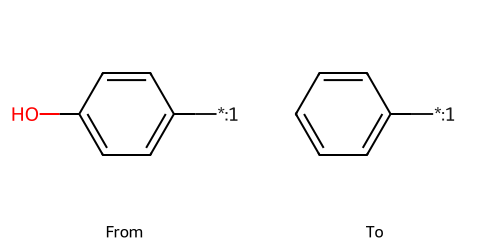

In [91]:
mmp_rule_viewer(37420771, df_pair_props)

In [ ]:
# TODO: check pairs not changes (always non-promiscurity, there is no example that are always promiscuous)

# TODO: check pairs that are sometimes promiscuous and sometimes non-promiscuous

# TODO: check the size of pairs changed


# End